# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We will need to clean and combine the data before we start asking the data some questions.

#### Objective
In this project, we aim to answer a couple of questions:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [393]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")

In [394]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

## Exploring the datasets

In [395]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [396]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [397]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [398]:
print(tafe_survey.isnull().sum())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


In [399]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [400]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## Dete Survey: First Obervations

The dataframe consists of 822 rows and 56 columns. The following columns have the highest null values:

* Torres Strait - 819
* South Sea - 815
* Aboriginal - 806
* Disability - 799
* NESB - 790
* Business Unit - 696

I'll take a look at the Tafe dataset before deciding what to do with these columns with high null value count.


### Tafe Survey: First Obervations

The dataframe consists of 702 rows and 72 columns which means this dataframe has a different size than the Dete survey. The number of null values are a lot lower than appears in the Dete dataset.

The column names need to be tidy and, as well, columns can potentially be removed before joining these 2 tables.



In [401]:
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [402]:
#drop some columns from tafe survey that
#won't be used in the analysis to make the dataframes 
#easier to work with

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

## Cleaning column names

* Rename the remaining columns in the `dete_survey_updated` dataframe.
    * Use the following criteria to update the column names:
        * Make all the capitalization lowercase.
        * Remove any trailing whitespace from the end of the strings.
        * Replace spaces with underscores ('_').
        
* As an example, `Cease Date` should be updated to `cease_date`.

#### dete_survey_updated

In [403]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [404]:
dete_survey_updated.columns=dete_survey_updated.columns.str.strip().str.lower().str.replace('\s+','_')

In [405]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### tafe_survey_updated

In [406]:
tafe_survey_updated=tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [407]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Data Filtering

In [408]:
dete_survey_updated.copy()['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [409]:
pattern =r"Resignation"

In [410]:
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains(pattern)]

In [411]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [412]:
tafe_survey_updated.copy()['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [413]:
tafe_resignations=tafe_survey_updated.loc[tafe_survey_updated['separationtype']=='Resignation']

In [414]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Observations
Employee resignation is the leading reason for employees leaving the company more than any other reason next to age retirement and contract expiration.

An early assumption can be made that employees are leaving due to dissatisfaction

## Data Verification

In [415]:
dete_resignations['cease_date'].value_counts() 

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

#### extract "year"

In [416]:
# method one - regex
year=r'([2][0-9]{3})'
dete_resignations['cease_year']=dete_resignations['cease_date'].copy().str.extract(year,expand=False)
dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)

In [417]:
# method two - split
dete_resignations['cease_year'] = dete_resignations['cease_date'].copy().str.split('/').str[-1]
dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)

In [418]:
dete_resignations['cease_year'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

In [419]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

From the work we did in the last screen, we can verify that there aren't any major issues with the years.

In [420]:
#creating a new column in the "dete_resignations_copy" dataframe
dete_resignations['institute_service']=dete_resignations['cease_year']-dete_resignations['dete_start_date']

## Identifying Dissatisfied Employees
Identifying the employees who resigned due to dissatisfaction with their job and categorize them as 'dissatisfied' in each dataframe. The 'dissatisfied' criteria for an employee is if he or she indicated that any of the following factores caused her/him to resign.

DETE Survey:

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

TAFE Survey:

* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

In [421]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [422]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Update the values in the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` in the tafe_resignations dataframe so that each contains only True, False, or NaN values.

In [423]:
#create a function that takes an dataframe (elem) and returns values (False,True, or NaN) given requirements
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value=='-':
        return False
    else:
        return True



In [424]:
tafe_resignations['dissatisfied']=tafe_resignations.copy()[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1,skipna=False)       
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [425]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'cease_year', 'institute_service'],
      dtype='object')

In [426]:
column=['job_dissatisfaction', 
        'dissatisfaction_with_the_department',
        'physical_work_environment', 
        'lack_of_recognition',
        'lack_of_job_security', 
        'work_location', 
        'employment_conditions', 
        'work_life_balance', 
        'workload']

dete_resignations['dissatisfied']=dete_resignations.copy()[column].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [427]:
#Assign the results to dete_resignations_up and tafe_resignations_up.
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

For both dataframes, if the employee indicated any defined factors above which caused them to resign, I'll mark them as dissatisfied in a newly created column.

This will help in answering the initial question of:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

## Combining the Data

In [428]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [429]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],axis=0,ignore_index=True)
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
cease_year                                             300
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           3

In [430]:
# Drop columns with less than 500 non null values
combined_updated=combined.dropna(thresh = 500,axis = 1)
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company
Let's categorize the values in the `institute_service` column using the definitions above.

In [431]:
combined_updated['institute_service']=combined_updated['institute_service'].astype('str')
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
17.0                   6
14.0                   6
22.0                   6
12.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
28.0                   2
36.0                   2
26.0                   2
30.0                   2
25.0                   2


In [432]:
# Method 1 
combined_updated['s']=combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['s'].value_counts()

1     159
3      83
5      56
7      34
11     30
0      20
20     17
6      17
4      16
9      14
2      14
13      8
8       8
15      7
10      6
17      6
22      6
14      6
12      6
18      5
16      5
23      4
24      4
39      3
21      3
32      3
19      3
25      2
28      2
36      2
26      2
30      2
49      1
29      1
41      1
34      1
42      1
33      1
38      1
35      1
31      1
27      1
Name: s, dtype: int64

In [433]:
# Method 2
combined_updated['t']=combined_updated['institute_service'].astype(str)
combined_updated['t']=combined_updated['institute_service'].str.split('-').str[0]
combined_updated['t']=combined_updated['t'].str.replace('Less than 1 year','0').str.replace('More than 20 years','20')
combined_updated['t'].value_counts()


nan     88
0       73
1       64
3       63
5       33
11      26
5.0     23
1.0     22
7       21
0.0     20
3.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
20      10
8.0      8
13.0     8
15.0     7
20.0     7
10.0     6
14.0     6
17.0     6
22.0     6
12.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
21.0     3
32.0     3
19.0     3
39.0     3
28.0     2
36.0     2
26.0     2
25.0     2
30.0     2
27.0     1
38.0     1
33.0     1
35.0     1
41.0     1
34.0     1
42.0     1
29.0     1
31.0     1
49.0     1
Name: t, dtype: int64

In [434]:
# Method 3
def extract_num_char(x):
    if x[:2].isdigit():
        return x[:2]
    else:
        return x

combined_updated['r']=combined_updated['institute_service'].fillna('NA').apply(extract_num_char)

value_map={'Less than 1 year':'1',"More than 20 years":'20'}
combined_updated['r']=combined_updated['r'].replace(value_map)
combined_updated['r'].value_counts()


nan     88
1       73
1-2     64
3-4     63
5-6     33
11      30
5.0     23
1.0     22
7-10    21
3.0     20
0.0     20
6.0     17
20      17
4.0     16
2.0     14
9.0     14
7.0     13
13       8
8.0      8
15       7
22       6
10       6
14       6
12       6
17       6
16       5
18       5
23       4
24       4
32       3
19       3
39       3
21       3
28       2
30       2
26       2
36       2
25       2
31       1
34       1
42       1
38       1
29       1
35       1
27       1
33       1
41       1
49       1
Name: r, dtype: int64

In [435]:
combined_updated['institute_service']=combined_updated['t'].astype('float')

In [436]:
combined_updated['institute_service'].value_counts(dropna=False)

0.0     93
NaN     88
1.0     86
3.0     83
5.0     56
7.0     34
11.0    30
20.0    17
6.0     17
4.0     16
9.0     14
2.0     14
13.0     8
8.0      8
15.0     7
22.0     6
10.0     6
17.0     6
14.0     6
12.0     6
16.0     5
18.0     5
24.0     4
23.0     4
21.0     3
39.0     3
32.0     3
19.0     3
36.0     2
30.0     2
25.0     2
26.0     2
28.0     2
42.0     1
29.0     1
35.0     1
27.0     1
41.0     1
49.0     1
38.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

Next, we'll map each value to one of the career stage definitions above.

In [437]:
def institute_year(val):
    if val<3:
        return 'New'
    elif 3<=val<=6:
        return 'Experienced'
    elif 7<=val<=10:
        return 'Established'
    elif val>=11:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan
    
    
combined_updated['service_cat']=combined_updated['institute_service'].apply(institute_year)

In [438]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

In [439]:
#counting the number of True & False values,including NaNs
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [440]:
#replacing the missing values in the 'dissatisfied' column with the value that occurs most frequently in this column
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [450]:
#Changing datatype of 'dissatisfied' column to boolean
combined_updated['dissatisfied']=combined_updated['dissatisfied'].astype(bool)
combined_updated.pivot_table(index='service_cat',values='dissatisfied')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


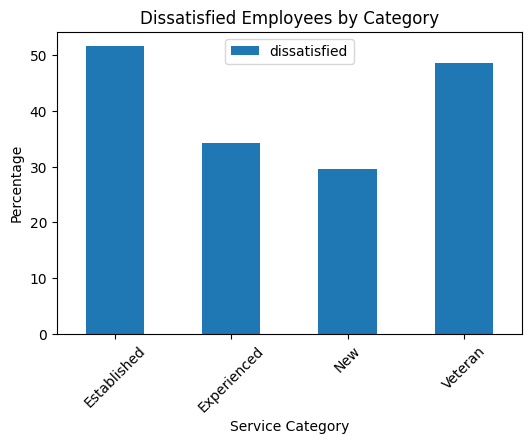

In [458]:
%matplotlib inline
combined_piv = combined_updated.pivot_table(index='service_cat', values='dissatisfied')*100
combined_piv.plot(kind='bar')
plt.title('Dissatisfied Employees by Category')
plt.xlabel('Service Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


In [443]:
def boolmap(value):
    if value == True:
        return 1
    else:
        return 0
    
combined_updated['dissatisfied_num']=combined_updated['dissatisfied'].apply(boolmap)

In [444]:
combined_updated['dissatisfied_num'].value_counts()

0    411
1    240
Name: dissatisfied_num, dtype: int64

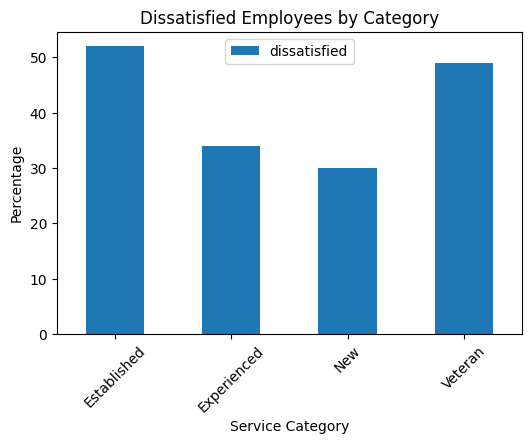

In [457]:
#calculating the percentage of dissatisfied employees in each 'service_cat' group
p_table = round(combined_updated.pivot_table(index=['service_cat'],values= ['dissatisfied'])*100,0)
p_table.plot(kind='bar')
plt.title('Dissatisfied Employees by Category')
plt.xlabel('Service Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()